In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

np.random.seed(0)  # for reproducibility

# Number of samples
n_samples = 500
m_samples = 400

# Generate 'Credit' and 'Income' (x features)
credit = np.random.normal(650, 100, n_samples)  # Average credit score
income = np.random.normal(5000, 800, n_samples)  # Average income in $

# Generate 'Potential Credit' and 'Potential Income' (r features)
# We assume that potential features are normally distributed around some transformation of the current features
potential_credit = credit + np.random.normal(50, 50, n_samples)  # Average increase in credit score
potential_income = income * np.random.normal(1.1, 0.05, n_samples)  # Average increase in income

# Combine into a DataFrame
data = pd.DataFrame({
    'Credit': credit,
    'Income': income,
    'Potential Credit': potential_credit,
    'Potential Income': potential_income
})


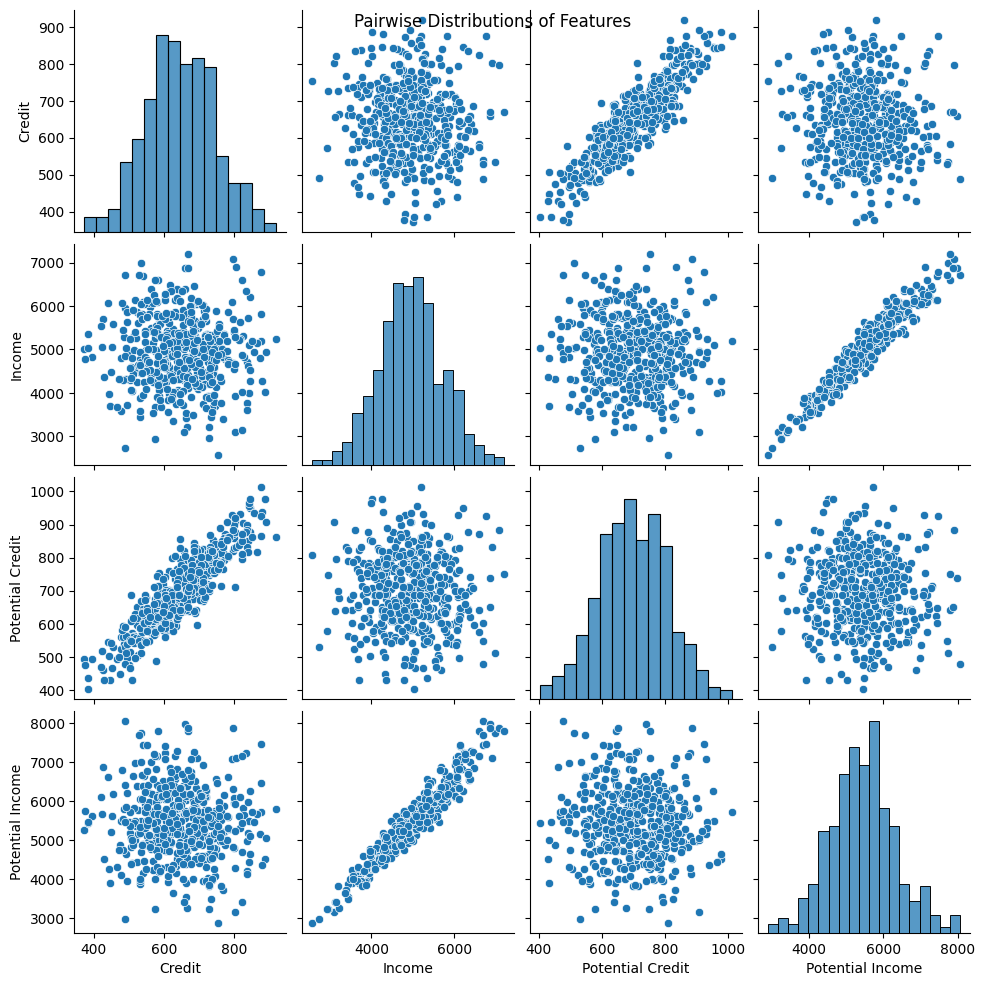

Correlation matrix:
                     Credit    Income  Potential Credit  Potential Income
Credit            1.000000 -0.040796          0.896563         -0.053864
Income           -0.040796  1.000000         -0.041442          0.961503
Potential Credit  0.896563 -0.041442          1.000000         -0.058812
Potential Income -0.053864  0.961503         -0.058812          1.000000


In [22]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.suptitle('Pairwise Distributions of Features')
plt.show()

# Calculate and display correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)


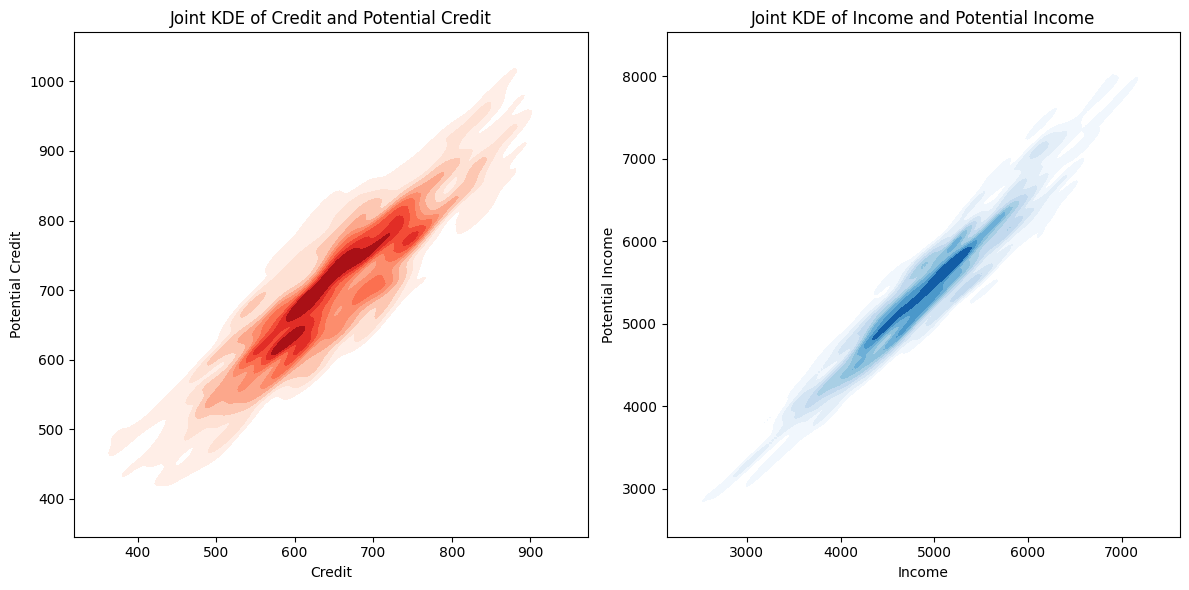

In [23]:
# Setting up the KDE plots for 'Credit' vs 'Potential Credit' and 'Income' vs 'Potential Income'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# KDE for Credit scores
sns.kdeplot(x=data['Credit'], y=data['Potential Credit'], ax=axes[0], cmap="Reds", shade=True, bw_adjust=.5)
axes[0].set_title('Joint KDE of Credit and Potential Credit')
axes[0].set_xlabel('Credit')
axes[0].set_ylabel('Potential Credit')

# KDE for Income
sns.kdeplot(x=data['Income'], y=data['Potential Income'], ax=axes[1], cmap="Blues", shade=True, bw_adjust=.5)
axes[1].set_title('Joint KDE of Income and Potential Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Potential Income')

plt.tight_layout()
plt.show()

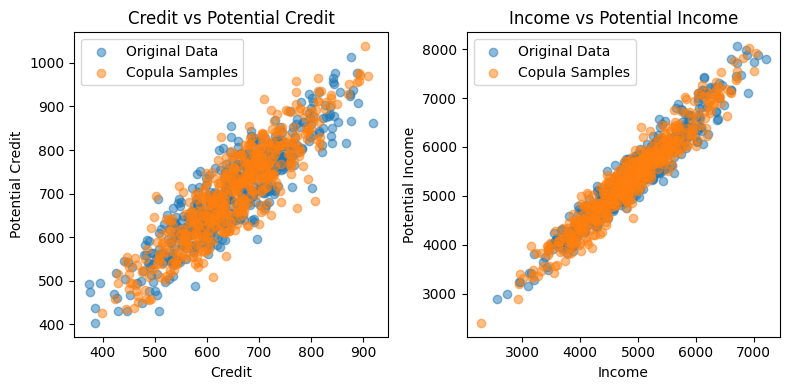

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copulas.multivariate import GaussianMultivariate

np.random.seed(0)  # for reproducibility

# Number of samples
n_samples = 500
m_samples = 400

# Generate 'Credit' and 'Income' (x features)
credit = np.random.normal(650, 100, n_samples)  # Average credit score
income = np.random.normal(5000, 800, n_samples)  # Average income in $

# Generate 'Potential Credit' and 'Potential Income' (r features)
# We assume that potential features are normally distributed around some transformation of the current features
potential_credit = credit + np.random.normal(50, 50, n_samples)  # Average increase in credit score
potential_income = income * np.random.normal(1.1, 0.05, n_samples)  # Average increase in income

# Combine into a DataFrame
data = pd.DataFrame({
    'Credit': credit,
    'Income': income,
    'Potential Credit': potential_credit,
    'Potential Income': potential_income
})

# Fit a Gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(data)

# Sample from the fitted copula to estimate the joint distribution
samples_copula = copula.sample(n_samples)

# Add samples to DataFrame
data['Credit Sampled'] = samples_copula['Credit']
data['Potential Credit Sampled'] = samples_copula['Potential Credit']
data['Income Sampled'] = samples_copula['Income']
data['Potential Income Sampled'] = samples_copula['Potential Income']

# Optionally, visualize the copula samples as scatter plots
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(data['Credit'], data['Potential Credit'], alpha=0.5, label='Original Data')
plt.scatter(data['Credit Sampled'], data['Potential Credit Sampled'], alpha=0.5, label='Copula Samples')
plt.title('Credit vs Potential Credit')
plt.xlabel('Credit')
plt.ylabel('Potential Credit')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data['Income'], data['Potential Income'], alpha=0.5, label='Original Data')
plt.scatter(data['Income Sampled'], data['Potential Income Sampled'], alpha=0.5, label='Copula Samples')
plt.title('Income vs Potential Income')
plt.xlabel('Income')
plt.ylabel('Potential Income')
plt.legend()

plt.tight_layout()
plt.show()
